# FAI Homework 4

**FBA Quant 이의형**

---

## Problem 1.

**(a)** Solve 3 problems in the book (Ace the Data Science Interview).  
Select each one from easy, medium, and hard, respectively.

---

**(easy)** 6.4. Lyft: Explain both covariance and correlation formulaically, and compare and contrast them.

$$\text {Cov} (X,Y) = E[(X-E(X))(Y-E(Y))]$$  

$$\text {Corr} (X,Y) = \frac {{Cov} (X,Y)} {\sqrt {Var(X) Var(Y)}}$$  

Covariance는 random variable X와 Y이 얼마나 동일하게 변화하는지 측정하는 지표이다.  
random variable X의 값과 평균 차이가 커질 때, random variable Y의 값과 평균 차이도 같이 커진다면 높은 값을 얻게 된다.  

Correlation은 각각의 표준편차를 곱하여 0 ~ 1까지의 값으로 스케일을 맞춰준 지표이다.

---

**(medium)** Akuna Capital: Say you have two random variables $X$ and $Y$, each with a standard deviation.  
What is the variance of $aX+bY$ for constants $a$ and $b$?

$$ \text {Var}(aX+bY) = E[(aX+bY)^2] - E[aX+bY]^2 $$

$$ = E[a^2X^2 + 2abXY + b^2Y^2] - (aE[X] + bE[Y])^2 $$

$$ =  a^2 E[X^2] + 2abE[XY] + b^2E[Y^2] - (a^2E[X]^2 + 2abE[X]E[Y] + b^2E[Y]) $$

$$ = a^2(E[X^2] - E[X]^2) + 2ab(E[XY] - E[X]E[Y]) + b^2(E[Y^2] - E[Y]^2$$

$$= a^2 \text {Var}(X) + 2ab\text {Cov} (X,Y) + b^2\text {Var}{Y}$$

---

**(hard)** 6.33. Morgan Stanley: Describe what a moment generating function (MGF) is.  
Derive the MGF for a normally distributed random variable X.

$$M(t) = E[e^{xt}] = \int_\infty^{-\infty} e^{xt} \frac {1} {\sqrt {2\pi}} e^{-x^2/2}dx = e^{t^2/2} \int_\infty^{-\infty} \frac {1} {\sqrt {2\pi}} e^{-(x-t)^2/2}dx = e^{t^2/2}$$

$$M'(t) = te^{t^2/2} \to M'(0) = 0$$  
$$M^{(2)}(t) = e^{t^2/2} + t^2 e^{t^2/2} \to M^{(2)}(0) = 1$$  
$$M^{(3)}(t) = te^{t^2/2} + 2te^{t^2/2} + t^3e^{t^2/2} \to M^{(3)}(0) = 0$$  
$$M^{(4)}(t) = 3e^{t^2/2} + 3t^2e^{t^2/2} + 3t^2e^{t^2/2} + t^4e^{t^2/2} \to M^{(4)}(0) = 3$$  

---

## Problem 2. 

Generates 3000 random log-normal stock price paths.  

Each stock has
- Initial price:100
- expected return(annual):0.05
- volatility(annual):0.2
- time horizon in years:1
- business days in year:250

Note)
- Please make sure to understand what log-normal is.  
- Please check whether generated stock paths have the appropriate moments(적률) or not.

---

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

class Backtest:
    def __init__(self):
        np.random.seed(48)
        self.trd_days_in_years = 250
        self.years = 1

        
    def generate_price_paths(self, num_stocks, init_price, annual_rtn, annual_vol, years, trd_days_in_years):
        self.trd_days_in_years = trd_days_in_years
        self.years = years
        
        daily_avg_rtn = annual_rtn / trd_days_in_years
        daily_avg_vol = annual_vol / np.sqrt(trd_days_in_years)
        trd_days = years * trd_days_in_years

        daily_returns = np.random.normal(daily_avg_rtn, daily_avg_vol, (trd_days, num_stocks))
        log_daily_returns = np.exp(daily_returns)
        price_paths = init_price * np.cumprod(log_daily_returns, axis=0)
        price_paths = pd.DataFrame(price_paths)

        price_paths = price_paths.shift(1, axis=0)
        price_paths.iloc[0,:] = init_price
        return price_paths


    def get_average_sharpe(self, price_paths):
        paths_annual_rtn = ((price_paths.iloc[-1,:] / price_paths.iloc[0,:]) - 1)**(1/self.years)
        paths_annual_vol = price_paths.pct_change(1, axis=0).std(axis=0) * np.sqrt(self.trd_days_in_years)
        sharp = paths_annual_rtn / paths_annual_vol
        return sharp.mean()
    
    
    def get_top_30_stocks(self, price_paths):
        final_price = price_paths.iloc[-1,:]
        sorted_price = final_price.sort_values(ascending=False)
        top_30_stocks = sorted_price.iloc[:30].index
        return top_30_stocks
    
    
    def jb_test_probablity(self, price_paths, alpha=0.05):
        test_pass = price_paths.apply(lambda x: True if stats.jarque_bera(x).pvalue < alpha else False)
        pass_rate = test_pass.sum() / test_pass.shape[0]
        print(f'Jarque-bera Test Pass: {pass_rate:.2%}')

**(a)** Plot 3000 stocks. Then plot Top 30 stocks with highest ending period price.

In [2]:
bt = Backtest()

params = dict(
    num_stocks = 3000,
    init_price = 100,
    annual_rtn = 0.05,
    annual_vol = 0.2,
    years = 1,
    trd_days_in_years = 250
)
price_paths = bt.generate_price_paths(**params)
price_paths

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,98.770762,98.683633,99.215980,101.372144,99.821058,101.413364,97.429119,100.910357,102.161294,99.518570,...,98.325056,101.201034,100.782448,99.269670,100.734715,102.644903,100.547917,101.799372,98.958642,100.244461
2,98.507229,97.523391,99.796835,101.409280,98.924373,99.863355,98.214374,100.880325,100.877900,99.847377,...,99.104545,99.380406,102.423167,100.155376,99.654617,104.658967,100.644705,101.065386,99.700749,100.334351
3,99.273681,98.744981,98.566769,100.891478,99.573908,99.197460,99.753332,101.629818,102.411486,99.444164,...,98.768228,100.167674,101.659978,99.394529,98.327879,104.656154,100.202371,101.140736,99.142407,100.277342
4,99.607713,99.525170,99.622279,99.290150,99.182417,98.662318,98.946414,102.835063,103.039369,100.510169,...,99.507580,101.042532,103.313821,100.056636,98.260012,105.044689,100.653558,102.586015,100.425026,99.950133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,100.553251,99.386585,93.187621,80.159775,126.316195,114.167430,98.651447,126.215672,120.686953,113.133530,...,83.586917,105.260515,132.755512,105.380609,87.056463,99.564279,140.072013,89.875884,93.022264,112.668297
246,98.324032,99.250906,92.380683,81.101055,126.161568,115.703815,96.794813,125.898413,118.652968,112.840743,...,84.114531,103.659565,133.328254,108.153629,86.771384,100.518902,139.102149,89.985183,93.197178,113.009257
247,102.112215,100.080319,91.504875,82.316467,128.077171,116.604548,97.937197,124.310489,121.175491,114.289201,...,83.440186,103.758987,132.670548,106.954269,85.881343,100.907587,137.152021,89.128258,92.944760,112.555862
248,100.211124,100.044282,90.670589,83.429533,129.322209,116.283550,99.099841,121.972423,122.939689,116.064992,...,83.747648,105.889816,130.923233,105.996148,84.715878,101.686742,134.512634,89.747742,92.441915,111.868520


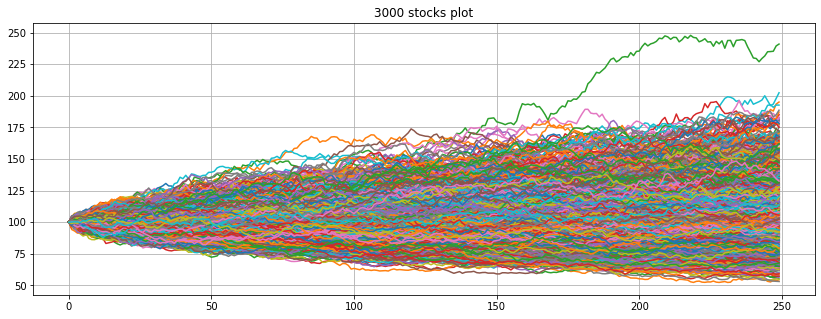

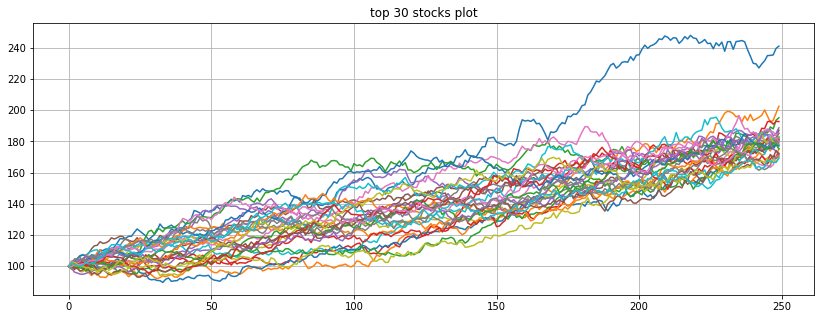

In [3]:
price_paths.plot(figsize=(14,5), title='3000 stocks plot', grid=True, legend=False);

top_30_stocks = bt.get_top_30_stocks(price_paths)
price_paths.loc[:,top_30_stocks].plot(figsize=(14,5), title='top 30 stocks plot', grid=True, legend=False);

In [4]:
bt.jb_test_probablity(price_paths, alpha=0.05)

Jarque-bera Test Pass: 85.27%


---

**(b)** Calculate the average Sharpe ratio of 3000 stocks and Top 30 stocks. Calculate the Sharpe ratio by (annual return / annual volatility).

In [5]:
print(f'3000 Stocks Average Sharpe: {bt.get_average_sharpe(price_paths):.4f}')
print(f'Top 30 Stocks Average Sharpe: {bt.get_average_sharpe(price_paths.loc[:,top_30_stocks]):.4f}')

3000 Stocks Average Sharpe: 0.3260
Top 30 Stocks Average Sharpe: 4.1325


---

**(c)** Is it okay to invest money on these 30 stocks? If not, why?

수익률이 정규분포라면 투자하면 안 된다.  
통계적으로 기간(샘플)이 늘어날수록 가격은 다시 평균으로 돌아올 것이다. (추후 낮은 수익률이 나올 확률이 높아질 것이다.)

---

**(d)** Now, we have longer time horizon in years:5. Repeat (a) and (b).

Jarque-bera Test Pass: 98.00%


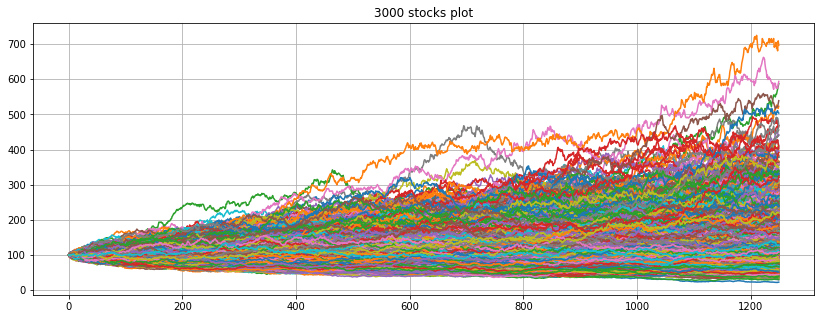

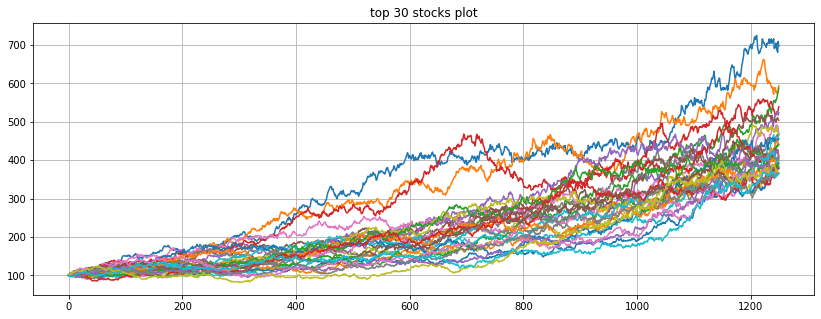

In [6]:
# (a)
bt2 = Backtest()

params = dict(
    num_stocks = 3000,
    init_price = 100,
    annual_rtn = 0.05,
    annual_vol = 0.2,
    years = 5,
    trd_days_in_years = 250
)
price_paths = bt2.generate_price_paths(**params)
top_30_stocks = bt2.get_top_30_stocks(price_paths)

price_paths.plot(figsize=(14,5), title='3000 stocks plot', grid=True, legend=False);
price_paths.loc[:,top_30_stocks].plot(figsize=(14,5), title='top 30 stocks plot', grid=True, legend=False);

bt2.jb_test_probablity(price_paths, alpha=0.05)

In [7]:
# (b)
print(f'3000 Stocks Average Sharpe: {bt2.get_average_sharpe(price_paths):.4f}')
print(f'Top 30 Stocks Average Sharpe: {bt2.get_average_sharpe(price_paths.loc[:,top_30_stocks]):.4f}')

3000 Stocks Average Sharpe: 4.2982
Top 30 Stocks Average Sharpe: 6.3996


---

**(e)** What intuition we can get from these results? Think about the relation with backtesting.

샘플이 많아질수록 종목들의 샤프비율의 차이는 적어진다. (평균에 가까워진다.)

3000 Stocks Average Sharpe: 5.2252
Top 30 Stocks Average Sharpe: 5.8026


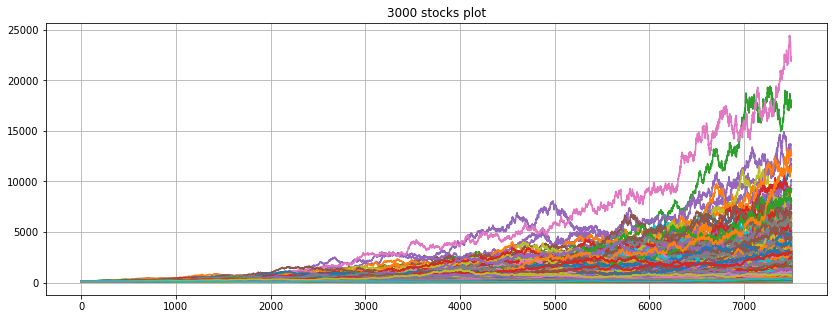

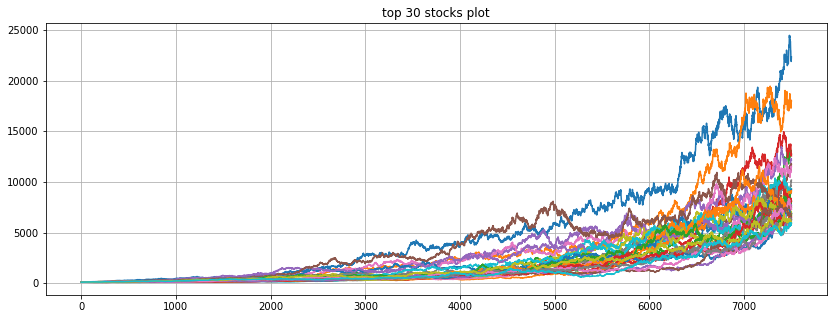

In [8]:
# 30년 예시
bt3 = Backtest()

params = dict(
    num_stocks = 3000,
    init_price = 100,
    annual_rtn = 0.05,
    annual_vol = 0.2,
    years = 30,
    trd_days_in_years = 250
)
price_paths = bt3.generate_price_paths(**params)
top_30_stocks = bt3.get_top_30_stocks(price_paths)

price_paths.plot(figsize=(14,5), title='3000 stocks plot', grid=True, legend=False);
price_paths.loc[:,top_30_stocks].plot(figsize=(14,5), title='top 30 stocks plot', grid=True, legend=False);

print(f'3000 Stocks Average Sharpe: {bt3.get_average_sharpe(price_paths):.4f}')
print(f'Top 30 Stocks Average Sharpe: {bt3.get_average_sharpe(price_paths.loc[:,top_30_stocks]):.4f}')

---